<a href="https://colab.research.google.com/github/StuartLiv/CPSC-440-Project/blob/main/models/infoflow/stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import userdata

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/StuartLiv/CPSC-440-Project


Cloning into 'CPSC-440-Project'...
remote: Enumerating objects: 166726, done.
remote: Counting objects: 100% (311/311), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 166726 (delta 164), reused 279 (delta 148), pack-reused 166415
Receiving objects: 100% (166726/166726), 841.70 MiB | 30.51 MiB/s, done.
Resolving deltas: 100% (37123/37123), done.
Updating files: 100% (249508/249508), done.


In [3]:
def get_meanvar(name):
  arr = np.load('/content/CPSC-440-Project/infoflow/' + name)
  return np.mean(arr,axis=1), np.sqrt(np.var(arr,axis=1))

In [4]:
labm, labv = get_meanvar('lab_ranks.npy')
lab32m, lab32v = get_meanvar('lab32_ranks.npy')
lab64m, lab64v = get_meanvar('lab64_ranks.npy')
# lab128m, lab128v = get_meanvar('lab128_ranks.npy')

rgbm, rgbv = get_meanvar('rgb_ranks.npy')
rgb32m, rgb32v = get_meanvar('rgb32_ranks.npy')
rgb64m, rgb64v = get_meanvar('rgb64_ranks.npy')
rgb128m, rgb128v = get_meanvar('rgb128_ranks.npy')

In [5]:
labm, labv

(array([  5.26,  23.39, 108.25,  21.41,  12.99]),
 array([0.8788629 , 2.3404914 , 7.50649719, 3.15624777, 1.01483989]))

In [6]:
for i in range(5):
  print(f'{labm[i]} ± {labv[i]:.2f}')

5.26 ± 0.88
23.39 ± 2.34
108.25 ± 7.51
21.41 ± 3.16
12.99 ± 1.01


In [7]:
for i in range(5):
  print(f'{rgbm[i]} ± {rgbv[i]:.2f}')

4.79 ± 0.86
21.38 ± 3.32
105.27 ± 11.09
11.23 ± 2.46
13.51 ± 1.91


In [25]:
RGBm = {
    256: rgbm,

    128: rgb128m,
    64: rgb64m,

    32: rgb32m,
}

RGBv = {
    256: rgbv,

    128: rgb128v,
    64: rgb64v,

    32: rgb32v,

}


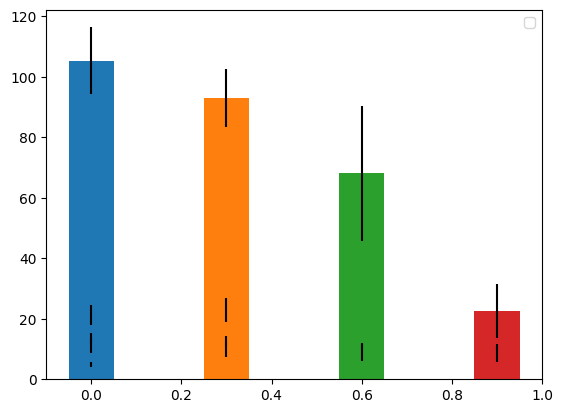

In [26]:
x = np.arange(4)  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

for dim, mean in RGBm.items():
    offset = width * multiplier
    plt.bar(offset, mean, width, yerr=RGBv[dim])
    multiplier += 1.5
    # ax.bar_label(rects, padding=3)
    multiplier += 1.5

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.legend()
plt.show()